In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [2]:
#The following CSV file compiles all the differentially expressed genes per cell type from Logistic Regression analysis.  
data= pd.read_csv('./PE_global_heatmaps/DEG_sex_MT_corrected_global_060521.csv', index_col= 'gene')

data.head()

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cell_type,origin
gene,,,,,,,
HTRA4,0.0,1.629718,0.285,0.030,0.0,vSCT1,villi
LEP,0.0,1.321953,0.192,0.019,0.0,vSCT1,villi
FLT1,0.0,1.311863,0.614,0.305,0.0,vSCT1,villi
SERPINE1,0.0,1.190303,0.361,0.226,0.0,vSCT1,villi
FOS,0.0,1.075647,0.551,0.255,0.0,vSCT1,villi


In [3]:
data.shape

(1701, 7)

In [4]:
#Confirm if only significant genes are listed:
data_deg= data[data['p_val_adj'] < 0.05]

data_deg.head()

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cell_type,origin
gene,,,,,,,
HTRA4,0.0,1.629718,0.285,0.030,0.0,vSCT1,villi
LEP,0.0,1.321953,0.192,0.019,0.0,vSCT1,villi
FLT1,0.0,1.311863,0.614,0.305,0.0,vSCT1,villi
SERPINE1,0.0,1.190303,0.361,0.226,0.0,vSCT1,villi
FOS,0.0,1.075647,0.551,0.255,0.0,vSCT1,villi


In [5]:
data_deg.shape #good to go

(1701, 7)

In [6]:
#Number of DEG(s) per cell type:
data_deg.groupby('cell_type').size()

cell_type
dFB             4
dGranul         3
dLEC           54
dMAC1         109
dMAC2         150
dNK1          110
dNK2           50
dSC1           23
dSMC            7
dTcell         51
dVEC           31
vFB            12
vHBC_AP        18
vHBC_LYVE1     68
vMC            37
vSCT1         286
vSCT2         276
vSCTjuv       155
vTcell         26
vVCT          105
vVEC          126
dtype: int64

In [7]:
#Order the cell-types for the 'strip-plot': main fig.3A
order= ['vSCT1', 'vSCT2', 'vSCTjuv', 'vVEC', 'vVCT', 'vHBC_LYVE1', 'vMC', 'vTcell', 'vHBC_AP', 'vFB',   
        'dMAC2', 'dNK1', 'dMAC1', 'dLEC', 'dTcell', 'dNK2', 'dVEC', 'dSC1', 'dSMC', 'dFB', 'dGranul']

#Define color codes a/c main fig.1B:
cols_list= ['#ff99cc', '#ff0080', '#cc33ff', '#fd96a9', '#00b3b3', '#fe6776', '#713e5a', '#a799b7', '#c0c999', '#dec1ff', 
           '#e01a4f', '#bde4a7', '#998650', '#bfff80', '#7d8cc4', '#009900', '#f87060', '#56cbf9', '#0b1d51',
           '#bf3100', '#ec9f05']

In [8]:
#Reorder the cell-types according to the most dysregulated within tissue.  
data_deg["cell_type"] = pd.Categorical(data_deg["cell_type"], categories = order)

data_deg= data_deg.sort_values(by = "cell_type")
data_deg.head()

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cell_type,origin
gene,,,,,,,
HTRA4,0.000000e+00,1.629718,0.285,0.030,0.000000e+00,vSCT1,villi
TM9SF3,1.460000e-64,-0.254903,0.168,0.246,3.800000e-60,vSCT1,villi
GRIK1,6.430000e-65,0.297315,0.165,0.117,1.680000e-60,vSCT1,villi
KCNH7,2.920000e-66,0.253670,0.107,0.058,7.630000e-62,vSCT1,villi
LIFR,3.890000e-67,0.350966,0.434,0.373,1.020000e-62,vSCT1,villi


In [9]:
data_deg.groupby('cell_type').size() #double check

cell_type
vSCT1         286
vSCT2         276
vSCTjuv       155
vVEC          126
vVCT          105
vHBC_LYVE1     68
vMC            37
vTcell         26
vHBC_AP        18
vFB            12
dMAC2         150
dNK1          110
dMAC1         109
dLEC           54
dTcell         51
dNK2           50
dVEC           31
dSC1           23
dSMC            7
dFB             4
dGranul         3
dtype: int64

In [14]:
#Control the jitter size as preferred: 

def make_de_strip_plot(all_de):
    fig = plt.figure(figsize=[10,6])
    order= ['vSCT1', 'vSCT2', 'vSCTjuv', 'vVEC', 'vVCT', 'vHBC_LYVE1', 'vMC', 'vTcell', 'vHBC_AP', 'vFB',   
        'dMAC2', 'dNK1', 'dMAC1', 'dLEC', 'dTcell', 'dNK2', 'dVEC', 'dSC1', 'dSMC', 'dFB', 'dGranul']
    #order = all_de.cell_type.value_counts().index

    ax1 = sns.stripplot(data=all_de, 
              y='avg_logFC', 
              x='cell_type', 
              order= None,
              jitter=True, 
              size=4,
              alpha=.8,
              palette= cols_list
              )
    plt.xticks(rotation=45, horizontalalignment="right");#rotation_mode="anchor");
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    #num_de_genes = all_de.groupby('cell_type').size().sort_values(ascending=False)
    num_de_genes= all_de.groupby('cell_type').size()
    ax2.hlines(num_de_genes, np.arange(len(order))-.4, np.arange(len(order))+.4, colors='k', linewidth=2)
    ax2.set_ylabel('Number of signficant PE vs lateC DEGs', color='k')  # we already handled the x-label with ax1
    
    for i,num in enumerate(num_de_genes):
        ax2.text(s=str(num), x=i, y=num+6, ha='center', fontsize='large', fontweight='bold')

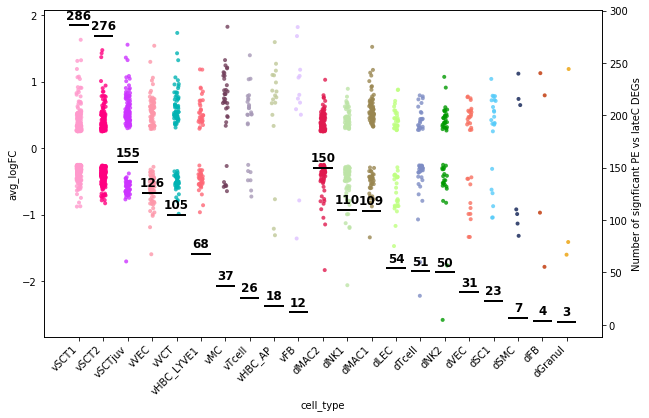

In [15]:
cg= make_de_strip_plot(data_deg)

#plt.savefig("./figures/PE_celltype_DEG_stripplot_3A.pdf", dpi=600)

In the final figure, both upregulated & downregulated genes are separately written & the dashed lines with the #totalDEG(s) are removed. 

In [18]:
#Control the jitter size as preferred: 

def make_de_strip_plot(all_de):
    fig = plt.figure(figsize=[10,6])
    order= ['vSCT1', 'vSCT2', 'vSCTjuv', 'vVEC', 'vVCT', 'vHBC_LYVE1', 'vMC', 'vTcell', 'vHBC_AP', 'vFB',   
        'dMAC2', 'dNK1', 'dMAC1', 'dLEC', 'dTcell', 'dNK2', 'dVEC', 'dSC1', 'dSMC', 'dFB', 'dGranul']
    #order = all_de.cell_type.value_counts().index

    ax1 = sns.stripplot(data=all_de, 
              y='avg_logFC', 
              x='cell_type', 
              order= None,
              jitter=True, 
              size=4,
              alpha=.8,
              palette= cols_list
              )
    plt.xticks(rotation=45, horizontalalignment="right");#rotation_mode="anchor");
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    #num_de_genes = all_de.groupby('cell_type').size().sort_values(ascending=False)
    #num_de_genes= all_de.groupby('cell_type').size()
    #ax2.hlines(num_de_genes, np.arange(len(order))-.4, np.arange(len(order))+.4, colors='k', linewidth=2)
    #ax2.set_ylabel('Number of signficant PE vs lateC DEGs', color='k')  # we already handled the x-label with ax1
    
    #for i,num in enumerate(num_de_genes):
        #ax2.text(s=str(num), x=i, y=num+6, ha='center', fontsize='large', fontweight='bold')

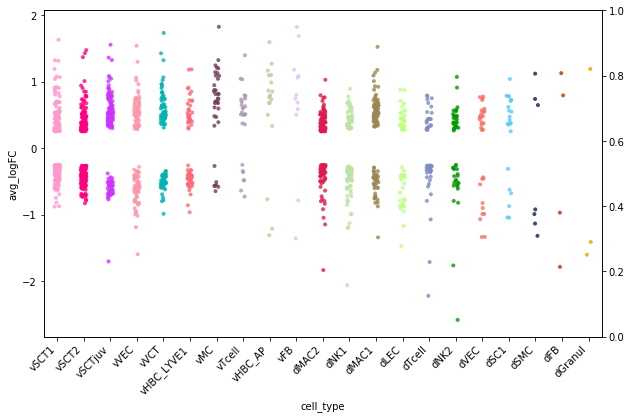

In [21]:
cg= make_de_strip_plot(data_deg)

plt.savefig("PE_celltype_DEG_stripplot_3A.pdf", dpi=800)

#Rename vDC as vPAMM.
#Rename vHBC_LYVE1 as vHBC. 
#dGranul excluded. 